# 0. –ò–º–ø–æ—Ä—Ç—ã –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [2]:
!pip install transformers[torch]
#!pip install accelerate -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 309.4/309.4 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [48]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer, DistilBertForSequenceClassification, AutoModelForTokenClassification,
    AutoTokenizer, TrainingArguments, Trainer, DataCollatorForTokenClassification
)
from pymystem3 import Mystem
from sklearn.model_selection import train_test_split

In [4]:
# —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –¥–ª–∏–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ,
# —Ç. –∫. –∫–∞–∂–¥–æ–º—É —Å–ª–æ–≤—É –º–æ–∂–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç–æ–∫–µ–Ω–æ–≤ —Ä–∞–∑–Ω–æ–π –¥–ª–∏–Ω—ã,
# –∞ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –º–∏–Ω–∏–±–∞—Ç—á–µ–π —Ç–µ–Ω–∑–æ—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞
# –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ–¥–Ω–æ–π –¥–ª–∏–Ω—ã
PADDING_MAX_LENGTH = 32

### –†–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

–ó–∞–≥—Ä—É–∑–∏–º —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º –∏—Ö –∫ —Ä–∞–±–æ—Ç–µ. –î–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–∞–∑–º–µ—á–µ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É, —Ä–∞–∑–º–µ—Ä –∫–æ—Ç–æ—Ä–æ–π —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 5 000 —Ç–æ–∫–µ–Ω–æ–≤. –†–∞–∑–º–µ—á–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç 2 —Å—Ç–æ–ª–±—Ü–∞: word –∏ label. –í –ø–µ—Ä–≤–æ–º —Å—Ç–æ–ª–±—Ü–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è —Ç–æ–∫–µ–Ω—ã, –≤–æ –≤—Ç–æ—Ä–æ–º - –º–µ—Ç–∫–∞ –±—É–ª–µ–≤–æ–≥–æ —Ç–∏–ø–∞, –≥–¥–µ 1 –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ç–æ–∫–µ–Ω –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –æ–±–ª–∞—Å—Ç–∏ —Å–µ–Ω—Å–æ—Ä–Ω–æ–π –ª–µ–∫—Å–∏–∫–∏, –∞ 0 - –Ω–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è.

In [ ]:
labeled_words = pd.read_excel("train_set.xlsx")

In [ ]:
labeled_words

T–∞–±–ª–∏—Ü–∞ 1 Unnamed: 1
0               word      label
1              –û—á–µ–Ω—å          0
2      –ø—Ä–∏–≤–µ—Ä–µ–¥–ª–∏–≤—ã–π          0
3             –∞—Ä–æ–º–∞—Ç          1
4                  .          0
...              ...        ...
5676           –∑–∞–ø–∞—Ö          1
5677  —Å–≤–µ–∂–µ—Å–∫–æ—à–µ–Ω–Ω–æ–π          0
5678           —Ç—Ä–∞–≤—ã          1
5679        –∏–¥–µ–∞–ª—å–Ω–æ          0
5680        —Å–æ–≤–ø–∞–¥—É—Ç          0

[5681 rows x 2 columns]

In [ ]:
labeled_words.columns = labeled_words.iloc[0]
labeled_words = labeled_words.iloc[1:]

In [ ]:
labeled_words

0               word label
1              –û—á–µ–Ω—å     0
2      –ø—Ä–∏–≤–µ—Ä–µ–¥–ª–∏–≤—ã–π     0
3             –∞—Ä–æ–º–∞—Ç     1
4                  .     0
5        –†–∞–∑–Ω–∞—à–∏–≤–∞–ª–∏     0
...              ...   ...
5676           –∑–∞–ø–∞—Ö     1
5677  —Å–≤–µ–∂–µ—Å–∫–æ—à–µ–Ω–Ω–æ–π     0
5678           —Ç—Ä–∞–≤—ã     1
5679        –∏–¥–µ–∞–ª—å–Ω–æ     0
5680        —Å–æ–≤–ø–∞–¥—É—Ç     0

[5680 rows x 2 columns]

In [ ]:
labeled_words = labeled_words.dropna()

In [ ]:
labeled_words

0               word label
1              –û—á–µ–Ω—å     0
2      –ø—Ä–∏–≤–µ—Ä–µ–¥–ª–∏–≤—ã–π     0
3             –∞—Ä–æ–º–∞—Ç     1
4                  .     0
5        –†–∞–∑–Ω–∞—à–∏–≤–∞–ª–∏     0
...              ...   ...
5676           –∑–∞–ø–∞—Ö     1
5677  —Å–≤–µ–∂–µ—Å–∫–æ—à–µ–Ω–Ω–æ–π     0
5678           —Ç—Ä–∞–≤—ã     1
5679        –∏–¥–µ–∞–ª—å–Ω–æ     0
5680        —Å–æ–≤–ø–∞–¥—É—Ç     0

[5583 rows x 2 columns]

In [ ]:
mystem = Mystem()

def lemmatize_text(text):
    lemmatized_text = []
    for sentence in text:
        lemmas = mystem.lemmatize(sentence)
        lemmas = [lemma for lemma in lemmas if lemma[0].isalpha()]
        lemmatized_text.append(' '.join(lemmas))
    return lemmatized_text

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
labeled_words['word'] = labeled_words['word'].apply(lambda x: mystem.lemmatize(str(x))[0])

<ipython-input-11-fcb83ac3f1ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_words['word'] = labeled_words['word'].apply(lambda x: mystem.lemmatize(str(x))[0])


In [ ]:
labeled_words

0               word label
1              –æ—á–µ–Ω—å     0
2      –ø—Ä–∏–≤–µ—Ä–µ–¥–ª–∏–≤—ã–π     0
3             –∞—Ä–æ–º–∞—Ç     1
4                  .     0
5        —Ä–∞–∑–Ω–∞—à–∏–≤–∞—Ç—å     0
...              ...   ...
5676           –∑–∞–ø–∞—Ö     1
5677  —Å–≤–µ–∂–µ—Å–∫–æ—à–µ–Ω–Ω—ã–π     0
5678           —Ç—Ä–∞–≤–∞     1
5679        –∏–¥–µ–∞–ª—å–Ω–æ     0
5680       —Å–æ–≤–ø–∞–¥–∞—Ç—å     0

[5583 rows x 2 columns]

### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import matplotlib.pyplot as plt

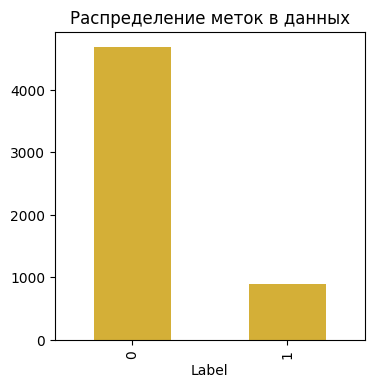

In [ ]:
label_counts = labeled_words.groupby('label').size()
plt.figure(figsize=(4, 4))
label_counts.plot(kind='bar', color='#d4af37')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö')
plt.xlabel('Label')
plt.xticks([0, 1], ['0', '1'])
plt.show()

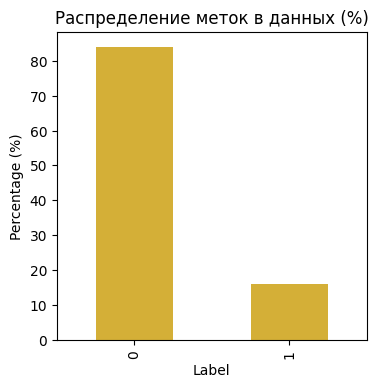

In [ ]:
label_percentages = (label_counts / label_counts.sum()) * 100
plt.figure(figsize=(4, 4))
label_percentages.plot(kind='bar', color='#d4af37')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö (%)')
plt.xlabel('Label')
plt.xticks([0, 1], ['0', '1'])
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
label_percentages

label
0    84.112484
1    15.887516
dtype: float64

# 1. DistilBERT

### –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 1: 3 —ç–ø–æ—Ö–∏, lr = 2e-5

–†–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–µ–ª–∏–º –Ω–∞ train, test, validation set –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 80 - 10 - 10. –¢–∞–∫–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∑–∞—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–ª–æ —Å–µ–±—è –≤ —Ç–æ–º —á–∏—Å–ª–µ –∏ –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–∏–º–∏ –≤—ã–±–æ—Ä–∫–∞–º–∏.

In [ ]:
words = list(labeled_words["word"])
labels = list(labeled_words["label"])

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(words, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(set(y_train)))

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
    

–†–µ–∞–ª–∏–∑—É–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ PyTorch Dataset. –≠—Ç–æ—Ç —à–∞–≥ –Ω–µ–æ–±—Ö–æ–¥–∏–º, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å —É—Å–ø–µ—à–Ω—ã–π –≤—Ö–æ–¥ –¥–∞–Ω–Ω—ã—Ö –≤ –º–æ–¥–µ–ª—å.

In [ ]:
class BinaryClassificationDataset(Dataset):
    def __init__(self, words, labels, tokenizer, max_length=128):
        # –≤–∞–ª–∏–¥–∞—Ü–∏—è –≤—Ö–æ–¥–∞
        if not len(words) == len(labels):
            raise ValueError('words and labels must have the same length')

        self.words = words
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.words)

    def __getitem__(self, idx):
        word = self.words[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            word,
            truncation=True,
            padding='max_length',
            max_length=PADDING_MAX_LENGTH,
            return_tensors='pt' #–≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —ç–Ω–∫–æ–¥–∏–Ω–≥–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤ PyTorch
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long).reshape(1)
        }

–°–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç—ã BinaryClassificationDataset –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ, —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –Ω—É–∂–Ω—ã–µ –Ω–∞–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä.

In [ ]:
train_dataset = BinaryClassificationDataset(X_train, y_train, tokenizer)
test_dataset = BinaryClassificationDataset(X_test, y_test, tokenizer)
val_dataset = BinaryClassificationDataset(X_val, y_val, tokenizer)

In [ ]:
train_dataset.words[1]

'–∏'

In [ ]:
train_dataset.labels[1]

0

In [ ]:
train_dataset[0]

{'input_ids': tensor([  101,  1188, 29747, 29750, 14150, 29742, 10325, 22919, 23742,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor([0])}

In [ ]:
for key, tensor in train_dataset[0].items():
    print(f"{key}: {tensor.size()}")

input_ids: torch.Size([32])
attention_mask: torch.Size([32])
labels: torch.Size([1])


In [ ]:
batch_size = 4

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy = "epoch", # –æ—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É
    learning_rate=2e-5, # —Ç–µ–º–ø –æ–±—É—á–µ–Ω–∏—è
    per_device_train_batch_size=batch_size, # —Ä–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –±–∞—Ç—á–∞ –Ω–∞ –∫–∞–∂–¥—ã–π –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    weight_decay=0.01, # —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
    push_to_hub=False, # –Ω–µ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å –Ω–∞ Huggingface
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


–ò—Å–ø–æ–ª—å–∑—É–µ–º DataCollator, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–æ–π–¥—ë—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ (–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞): DataCollatorForTokenClassification.

In [ ]:
data_collator = DataCollatorForTokenClassification(
    tokenizer, padding='max_length', max_length=PADDING_MAX_LENGTH,
    return_tensors='pt'
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
trainer.train()

TrainOutput(global_step=3351, training_loss=0.3147833222810705, metrics={'train_runtime': 5377.465, 'train_samples_per_second': 2.492, 'train_steps_per_second': 0.623, 'total_flos': 109405639639296.0, 'train_loss': 0.3147833222810705, 'epoch': 3.0})

#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ–±—É—á–µ–Ω–∏—è
1. Epoch 1: Training Loss = 0.372300, Validation Loss = 0.326051

2. Epoch 2: Training Loss = 0.308400, Validation Loss = 0.321302
   - Training Loss —É–º–µ–Ω—å—à–∏–ª—Å—è, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ–± —É–ª—É—á—à–µ–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
   - Validation Loss —Ç–∞–∫–∂–µ —É–º–µ–Ω—å—à–∏–ª—Å—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —É—Å–ø–µ—à–Ω–æ –æ–±—É—á–∞—Ç—å—Å—è.

3. Epoch 3: Training Loss = 0.240900, Validation Loss = 0.321442
   - Training Loss –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —É–º–µ–Ω—å—à–∞—Ç—å—Å—è, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –¥–∞–ª—å–Ω–µ–π—à–µ–º —É–ª—É—á—à–µ–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è.
   - Validation Loss –Ω–µ–º–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–∏–ª—Å—è, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–∞—á–∞–ª–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

–ú–æ–¥–µ–ª—å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –æ–±—É—á–∞–µ—Ç—Å—è, –Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –ø—Ä–∏ —Ç–∞–∫–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏, –∫–∞–∂–µ—Ç—Å—è, –Ω–µ —Å—Ç–æ–∏—Ç. –≠—Ç–æ—Ç —Ñ–∞–∫—Ç –≤–ø–æ–ª–Ω–µ –æ–±—ä—è—Å–Ω–∏–º: –Ω–∞—à–∞ —Ä–∞–∑–º–µ—á–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ –Ω–µ –æ—á–µ–Ω—å –≤–µ–ª–∏–∫–∞, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä–æ –º–æ–¥–µ–ª—å –Ω–∞—á–Ω–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ. –û–±—â–µ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –≤ 3 —ç–ø–æ—Ö–∏: 1,5 —á–∞—Å–∞.

#### –¢–µ—Å—Ç

In [ ]:
# –ó–∞–ø—É—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
test_output = trainer.predict(test_dataset)

In [ ]:
print(test_output)

PredictionOutput(predictions=array([[[ 3.7359428 , -4.389942  ],
        [ 3.4628892 , -4.1597815 ],
        [ 3.3698754 , -4.190154  ],
        ...,
        [ 3.4881158 , -4.2600594 ],
        [ 3.560462  , -4.2911606 ],
        [ 3.5644677 , -4.250073  ]],

       [[ 2.04945   , -1.7323271 ],
        [ 1.7719479 , -1.3509259 ],
        [ 1.6577656 , -1.1123594 ],
        ...,
        [-0.35636085,  0.7630871 ],
        [ 0.22201344,  0.20150506],
        [ 0.4433145 , -0.42623293]],

       [[ 3.9731047 , -4.8021655 ],
        [ 3.6022563 , -4.540674  ],
        [ 3.6029654 , -4.557472  ],
        ...,
        [ 3.665814  , -4.685128  ],
        [ 3.8484764 , -4.755722  ],
        [ 3.7318685 , -4.7763824 ]],

       ...,

       [[ 4.261021  , -5.1408014 ],
        [ 3.6380334 , -4.8038287 ],
        [ 3.3075223 , -4.26793   ],
        ...,
        [ 3.8135393 , -5.0230904 ],
        [ 3.9036498 , -5.025532  ],
        [ 3.7189255 , -4.9542465 ]],

       [[ 2.856595  , -3.0159733 ]

–ü—Ä–µ–≤—Ä–∞—Ç–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –≤ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤.

In [ ]:
predictions = test_output.predictions.tolist()

–ó–∞–¥–∞–¥–∏–º —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [ ]:
y_pred = []
for result in predictions:  # –ü—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ø–∏—Å–∫—É –≤ list_of_results
    if result[0] > result[1]:  # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø–µ—Ä–≤–æ–µ –∏ –≤—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ –≤ —Å–ø–∏—Å–∫–µ
        y_pred.append(0)  # –ï—Å–ª–∏ –ø–µ—Ä–≤–æ–µ —á–∏—Å–ª–æ –±–æ–ª—å—à–µ, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 0 –≤ y_pred
    else:
        y_pred.append(1)  # –ò–Ω–∞—á–µ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 1 –≤ y_pred

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       477
           1       0.78      0.73      0.75        82

    accuracy                           0.93       559
   macro avg       0.87      0.85      0.86       559
weighted avg       0.93      0.93      0.93       559



#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
- F1-score –¥–ª—è –∫–ª–∞—Å—Å–∞ 0 (—Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤–∫–ª—é—á–∞—é—Ç—Å—è –≤ –∫–ª–∞—Å—Å —Å–µ–Ω—Å–æ—Ä–Ω–æ–π –ª–µ–∫—Å–∏–∫–∏) - 0.96, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç —Ö–æ—Ä–æ—à–µ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã –¥–ª—è —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞.
- F1-score –¥–ª—è –∫–ª–∞—Å—Å–∞ 1 (—Ü–µ–ª–µ–≤–æ–π –∫–ª–∞—Å—Å, —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –æ—Ç–Ω–æ—Å–∏–º –∫ –∫–ª–∞—Å—Å—É —Å–µ–Ω—Å–æ—Ä–Ω–æ–π –ª–µ–∫—Å–∏–∫–∏) - 0.75, –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–π.

–û–¥–Ω–∞–∫–æ —è –Ω–µ —Å—á–∏—Ç–∞—é —ç—Ç–æ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ—É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–º, –∫–ª–∞—Å—Å—ã –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã –≤–≤–∏–¥—É —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ —Ü–µ–ª–µ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞. –ù–∞–ø–æ–º–Ω—é, —á—Ç–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö -- —ç—Ç–æ 16 –∏ 84 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ 1 –∏ 0 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.


### –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2: 2 —ç–ø–æ—Ö–∏, lr = 2e-5

In [ ]:
words = list(labeled_words["word"])
labels = list(labeled_words["label"])

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(words, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(set(y_train)))

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
    

–†–µ–∞–ª–∏–∑—É–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ PyTorch Dataset. –≠—Ç–æ—Ç —à–∞–≥ –Ω–µ–æ–±—Ö–æ–¥–∏–º, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å —É—Å–ø–µ—à–Ω—ã–π –≤—Ö–æ–¥ –¥–∞–Ω–Ω—ã—Ö –≤ –º–æ–¥–µ–ª—å.

In [ ]:
class BinaryClassificationDataset(Dataset):
    def __init__(self, words, labels, tokenizer, max_length=128):
        # –≤–∞–ª–∏–¥–∞—Ü–∏—è –≤—Ö–æ–¥–∞
        if not len(words) == len(labels):
            raise ValueError('words and labels must have the same length')

        self.words = words
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.words)

    def __getitem__(self, idx):
        word = self.words[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            word,
            truncation=True,
            padding='max_length',
            max_length=PADDING_MAX_LENGTH,
            return_tensors='pt' #–≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —ç–Ω–∫–æ–¥–∏–Ω–≥–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤ PyTorch
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long).reshape(1)
        }

–°–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç—ã BinaryClassificationDataset –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ, —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –Ω—É–∂–Ω—ã–µ –Ω–∞–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä.

In [ ]:
train_dataset = BinaryClassificationDataset(X_train, y_train, tokenizer)
test_dataset = BinaryClassificationDataset(X_test, y_test, tokenizer)
val_dataset = BinaryClassificationDataset(X_val, y_val, tokenizer)

In [ ]:
train_dataset.words[1]

'–∏'

In [ ]:
train_dataset.labels[1]

0

In [ ]:
train_dataset[0]

{'input_ids': tensor([  101,  1188, 29747, 29750, 14150, 29742, 10325, 22919, 23742,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor([0])}

In [ ]:
for key, tensor in train_dataset[0].items():
    print(f"{key}: {tensor.size()}")

input_ids: torch.Size([32])
attention_mask: torch.Size([32])
labels: torch.Size([1])


In [ ]:
batch_size = 4

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy = "epoch", # –æ—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É
    learning_rate=2e-5, # —Ç–µ–º–ø –æ–±—É—á–µ–Ω–∏—è
    per_device_train_batch_size=batch_size, # —Ä–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –±–∞—Ç—á–∞ –Ω–∞ –∫–∞–∂–¥—ã–π –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    weight_decay=0.01, # —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
    push_to_hub=False, # –Ω–µ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å –Ω–∞ Huggingface
)

–ò—Å–ø–æ–ª—å–∑—É–µ–º DataCollator, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–æ–π–¥—ë—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ (–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞): DataCollatorForTokenClassification.

In [ ]:
data_collator = DataCollatorForTokenClassification(
    tokenizer, padding='max_length', max_length=PADDING_MAX_LENGTH,
    return_tensors='pt'
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
trainer.train()

TrainOutput(global_step=2234, training_loss=0.34527474166883776, metrics={'train_runtime': 3537.7697, 'train_samples_per_second': 2.525, 'train_steps_per_second': 0.631, 'total_flos': 72937093092864.0, 'train_loss': 0.34527474166883776, 'epoch': 2.0})

#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ–±—É—á–µ–Ω–∏—è
–í–æ –≤—Ç–æ—Ä–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ª–æ—Å—Å–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –Ω–∏–∂–µ, —á–µ–º –≤ –ø–µ—Ä–≤–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ, –∫–∞–∫ –Ω–∞ –ø–µ—Ä–≤–æ–π, —Ç–∞–∫ –∏ –Ω–∞ –≤—Ç–æ—Ä–æ–π —ç–ø–æ—Ö–∞—Ö.
  - –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ: —ç—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å, –æ–±—É—á–µ–Ω–Ω–∞—è –≤–æ –≤—Ç–æ—Ä–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ, –±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞.
  - –û–¥–Ω–∞–∫–æ —Å–ª–µ–¥—É–µ—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –º–µ—Ç—Ä–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –ø–æ–ª—É—á–µ–Ω—ã –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ.

#### –¢–µ—Å—Ç

In [ ]:
# –ó–∞–ø—É—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
test_output = trainer.predict(test_dataset)

–ü—Ä–µ–≤—Ä–∞—Ç–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –≤ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤.

In [ ]:
predictions = test_output.predictions.tolist()

–ó–∞–¥–∞–¥–∏–º —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [ ]:
y_pred = []
for result in predictions:  # –ü—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ø–∏—Å–∫—É –≤ list_of_results
    if result[0] > result[1]:  # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø–µ—Ä–≤–æ–µ –∏ –≤—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ –≤ —Å–ø–∏—Å–∫–µ
        y_pred.append(0)  # –ï—Å–ª–∏ –ø–µ—Ä–≤–æ–µ —á–∏—Å–ª–æ –±–æ–ª—å—à–µ, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 0 –≤ y_pred
    else:
        y_pred.append(1)  # –ò–Ω–∞—á–µ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 1 –≤ y_pred

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       477
           1       0.48      0.87      0.62        82

    accuracy                           0.84       559
   macro avg       0.73      0.85      0.76       559
weighted avg       0.90      0.84      0.86       559



#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

  - –î–ª—è –Ω–µ—Ü–µ–ª–µ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ 0 (—Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ —Å–µ–Ω—Å–æ—Ä–Ω–æ–π –ª–µ–∫—Å–∏–∫–µ) –æ–±–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫. –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ, –ø–æ—Å–∫–æ–ª—å–∫—É —É –Ω–∞—Å –≤ –¥–∞–Ω–Ω—ã—Ö —Å–∏–ª—å–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–æ–ª—å–∑—É –µ–¥–∏–Ω–∏—Ü —Å –ª–µ–π–±–ª–æ–º 0.
  - –î–ª—è –∫–ª–∞—Å—Å–∞ 1 (—Å–µ–Ω—Å–æ—Ä–Ω–∞—è –ª–µ–∫—Å–∏–∫–∞), –∫–æ—Ç–æ—Ä—ã–π –≤–∞–∂–µ–Ω –¥–ª—è –Ω–∞—Å, —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2 –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ö—É–∂–µ –ø–æ F1-score, —á–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 1.
  - –î–ª—è –∫–ª–∞—Å—Å–∞ 1 –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–π precision, –ø—Ä–∏ —ç—Ç–æ–º –≤—ã—Å–æ–∫–∏–π recall. –¢–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å –ø–ª–æ—Ö–æ –æ—Ç–ª–∏—á–∞–µ—Ç –∏—Å—Ç–∏–Ω–Ω—ã–µ –µ–¥–∏–Ω–∏—Ü—ã –∫–ª–∞—Å—Å–∞ 1 –æ—Ç –∫–ª–∞—Å—Å–∞ 0.


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –∑–∞–ø—É—Å–∫–∞—Ç—å –º–æ–¥–µ–ª—å –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ 3 —ç–ø–æ—Ö–∏ –±—É–¥–µ—Ç –±–æ–ª–µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ. –î–∞–ª–µ–µ –±—É–¥–µ–º –∑–∞–ø—É—Å–∫–∞—Ç—å –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ 3 —ç–ø–æ—Ö–∏ –∏ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–º–µ–Ω—è—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä learning rate.


**–ë—ã–ª –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω –≤–∞—Ä–∏–∞–Ω—Ç 3 —ç–ø–æ—Ö–∏ + lr = 3e-4, —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±—ã–ª —Ö—É–∂–µ, —á–µ–º –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö 1 –∏ 2. –≠—Ç—É —á–∞—Å—Ç—å –∫–æ–¥–∞ –∑–¥–µ—Å—å –ø—Ä–∏–≤–æ–¥–∏—Ç—å —É–∂–µ –Ω–µ –±—É–¥—É, –ø–µ—Ä–µ–π–¥—ë–º —Å—Ä–∞–∑—É –∫ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É 3, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –æ–∫–∞–∑–∞–ª—Å—è —É—Å–ø–µ—à–Ω—ã–º.**

### –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3: 3 —ç–ø–æ—Ö–∏, lr = 1–µ-5

In [ ]:
words = list(labeled_words["word"])
labels = list(labeled_words["label"])

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(words, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(set(y_train)))

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
    

–†–µ–∞–ª–∏–∑—É–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ PyTorch Dataset. –≠—Ç–æ—Ç —à–∞–≥ –Ω–µ–æ–±—Ö–æ–¥–∏–º, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å —É—Å–ø–µ—à–Ω—ã–π –≤—Ö–æ–¥ –¥–∞–Ω–Ω—ã—Ö –≤ –º–æ–¥–µ–ª—å.

In [ ]:
class BinaryClassificationDataset(Dataset):
    def __init__(self, words, labels, tokenizer, max_length=128):
        # –≤–∞–ª–∏–¥–∞—Ü–∏—è –≤—Ö–æ–¥–∞
        if not len(words) == len(labels):
            raise ValueError('words and labels must have the same length')

        self.words = words
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.words)

    def __getitem__(self, idx):
        word = self.words[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            word,
            truncation=True,
            padding='max_length',
            max_length=PADDING_MAX_LENGTH,
            return_tensors='pt' #–≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —ç–Ω–∫–æ–¥–∏–Ω–≥–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤ PyTorch
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long).reshape(1)
        }

–°–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç—ã BinaryClassificationDataset –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ, —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –Ω—É–∂–Ω—ã–µ –Ω–∞–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä.

In [ ]:
train_dataset = BinaryClassificationDataset(X_train, y_train, tokenizer)
test_dataset = BinaryClassificationDataset(X_test, y_test, tokenizer)
val_dataset = BinaryClassificationDataset(X_val, y_val, tokenizer)

In [ ]:
train_dataset.words[10]

'–±—Ä–µ–Ω–¥'

In [ ]:
train_dataset.labels[10]

0

In [ ]:
train_dataset[0]

{'input_ids': tensor([  101,  1188, 29747, 29750, 14150, 29742, 10325, 22919, 23742,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor([0])}

In [ ]:
for key, tensor in train_dataset[0].items():
    print(f"{key}: {tensor.size()}")

input_ids: torch.Size([32])
attention_mask: torch.Size([32])
labels: torch.Size([1])


In [ ]:
batch_size = 4

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy = "epoch", # –æ—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É
    learning_rate=1e-5, # —Ç–µ–º–ø –æ–±—É—á–µ–Ω–∏—è
    per_device_train_batch_size=batch_size, # —Ä–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –±–∞—Ç—á–∞ –Ω–∞ –∫–∞–∂–¥—ã–π –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    weight_decay=0.01, # —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
    push_to_hub=False, # –Ω–µ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å –Ω–∞ Huggingface
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


–ò—Å–ø–æ–ª—å–∑—É–µ–º DataCollator, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–æ–π–¥—ë—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ (–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞): DataCollatorForTokenClassification.

In [ ]:
data_collator = DataCollatorForTokenClassification(
    tokenizer, padding='max_length', max_length=PADDING_MAX_LENGTH,
    return_tensors='pt'
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
trainer.train()

#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ–±—É—á–µ–Ω–∏—è
–ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –ª–æ—Å—Å–∞ —Å –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–æ–π, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ç–µ—Ä—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —ç–ø–æ—Ö–µ (0.311030) –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—à–µ, —á–µ–º –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–π —ç–ø–æ—Ö–µ (0.311328), –≤–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —É–∂–µ –Ω–∞—á–∞–ª–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –û–¥–Ω–∞–∫–æ —Ä–æ—Å—Ç –Ω–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π. –í —Ü–µ–ª–æ–º, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 3 –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —É—Å–ø–µ—à–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, –ø—Ä–∏ —ç—Ç–æ–º –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –ø—Ä–∏–µ–º–ª–µ–º–æ–º —É—Ä–æ–≤–Ω–µ.

#### –¢–µ—Å—Ç

In [ ]:
# –ó–∞–ø—É—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
test_output = trainer.predict(test_dataset)

–ü—Ä–µ–≤—Ä–∞—Ç–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –≤ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤.

In [ ]:
predictions = test_output.predictions.tolist()

–ó–∞–¥–∞–¥–∏–º —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [ ]:
y_pred = []
for result in predictions:  # –ü—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ø–∏—Å–∫—É –≤ list_of_results
    if result[0] > result[1]:  # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø–µ—Ä–≤–æ–µ –∏ –≤—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ –≤ —Å–ø–∏—Å–∫–µ
        y_pred.append(0)  # –ï—Å–ª–∏ –ø–µ—Ä–≤–æ–µ —á–∏—Å–ª–æ –±–æ–ª—å—à–µ, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 0 –≤ y_pred
    else:
        y_pred.append(1)  # –ò–Ω–∞—á–µ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 1 –≤ y_pred

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       477
           1       0.76      0.82      0.79        82

    accuracy                           0.94       559
   macro avg       0.86      0.89      0.88       559
weighted avg       0.94      0.94      0.94       559



#### –í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏
–ë–ª–∞–≥–æ–¥–∞—Ä—è —Ä–∞–±–æ—Ç–µ —Å learning rate —É–¥–∞–ª–æ—Å—å –ø–æ–¥–Ω—è—Ç—å f1-score –¥–ª—è —Ü–µ–ª–µ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å 0.75 –¥–æ 0.79. –¢–∞–∫–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –æ—Ü–µ–Ω–∏–≤–∞—é –∫–∞–∫ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–π, –ø–æ—ç—Ç–æ–º—É –∏–º–µ–Ω–Ω–æ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —ç—Ç–æ–≥–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –±—É–¥–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã: –≥–¥–µ –º–æ–¥–µ–ª—å –æ—à–∏–±–ª–∞—Å—å –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏, –∞ –≥–¥–µ –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∞ –º–µ—Ç–∫—É –ø—Ä–∞–≤–∏–ª—å–Ω–æ.

–ò–∑–≤–ª–µ—á–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞–∑–º–µ—Ç–∫–∏ –∏ –ø–æ–º–µ—Å—Ç–∏–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º.

In [ ]:
results = {'word': X_test, 'predicted_label': y_pred, 'true_label': y_test}
results_df = pd.DataFrame(results)


In [ ]:
results_df

word  predicted_label  true_label
0             —ç—Ç–æ                0           0
1    –º–∏–Ω–¥–∞–ª—å–Ω–æ—Å—Ç—å                1           1
2              –Ω–µ                0           0
3          –∫–∞–∂–¥—ã–π                0           0
4               .                0           0
..            ...              ...         ...
554             .                0           0
555        —á—Ç–æ-—Ç–æ                0           0
556             –∏                0           0
557          –¥–µ–ª–æ                0           0
558         —Å—Ç–∞—Ä—Ç                0           0

[559 rows x 3 columns]

–ë–æ–ª—å—à–æ–π –∏–Ω—Ç–µ—Ä–µ—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏.

In [ ]:
incorrect_clf = results_df[results_df['predicted_label'] != results_df['true_label']]

In [ ]:
incorrect_clf

word  predicted_label  true_label
13       —Ä–∞—Å–∫—Ä—ã—Ç–∏–µ                0           1
21       –Ω–µ–∂–Ω—è—Ç–∏–Ω–∞                0           1
34          –Ω–µ–∂–Ω—ã–π                0           1
58          –Ω–µ–∂–Ω—ã–π                0           1
68          –ª–µ—Ç–Ω–∏–π                1           0
74           –¥—ã–º–∫–∞                0           1
81       –ª–µ—Å–æ–ø–∏–ª–∫–∞                0           1
92             —Ñ–∏–≥                1           0
107     –æ–±–Ω—é—Ö–∏–≤–∞—Ç—å                0           1
112        —Å–ª–æ–∂–Ω—ã–π                1           0
163        –∂–µ–Ω—â–∏–Ω–∞                1           0
175           —Ç–æ—Ä—Ç                0           1
176        –≥–æ—Ç–æ–≤—ã–π                1           0
195           –∫–æ–∂–∞                1           0
221         —Å–ª—É—á–∞–π                1           0
224         –∂–≤–∞—á–∫–∞                1           0
249        —Ä–∞–¥–æ—Å—Ç—å                1           0
277       –≤–∏–¥–µ—Ç—å—Å—è                0           1
308       –æ—Ç—Ç–µ–Ω—è—Ç—å                0           1
309           –∫–æ–∂–∞                1           0
353         —à–µ–¥–µ–≤—Ä                1           0
354     –∂–∏–≤–æ—Ç–Ω–æ—Å—Ç—å                1           0
390  –≥–∞–Ω–∏–º–µ–¥–æ–≤—Å–∫–∏–π                1           0
395          —Ç–∞–±–∞–∫                0           1
446      –æ—Ç—á–∞—è–Ω–Ω—ã–π                1           0
459           –∑–∏–º–∞                1           0
477         –∂–µ—Å—Ç–∫–æ                0           1
504         —Ç–æ–Ω–∫–∏–π                1           0
511       –∫–∞—Ä–∞–º–µ–ª—å                0           1
515         —Å–µ–π—á–∞—Å                1           0
521   –ø–µ—Ä–µ–ª–∏–≤–∞—Ç—å—Å—è                0           1
522        –∂–µ–Ω—â–∏–Ω–∞                1           0
525        –∑–∞—Ç–µ—Å—Ç–æ                1           0
531           –∫—É—Å—Ç                1           0
534       —É—á—É–∏–≤–∞—Ç—å                0           1
541         –ø—É—Å–∫–∞–π                1           0

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª—É—á–∞–∏, –≥–¥–µ –º–æ–¥–µ–ª—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∞ –∫–ª–∞—Å—Å.

In [ ]:
correct_clf = results_df[(results_df['predicted_label'] == 1) & (results_df['true_label'] == 1)]

In [ ]:
correct_clf

word  predicted_label  true_label
1      –º–∏–Ω–¥–∞–ª—å–Ω–æ—Å—Ç—å                1           1
5    –æ–±–≤–æ–ª–∞–∫–∏–≤–∞—é—â–∏–π                1           1
12          –≥–æ—Ä—å–∫–∏–π                1           1
28             —Ä–æ–∑–∞                1           1
38            –∑–∞–ø–∞—Ö                1           1
..              ...              ...         ...
536         –ª–∞–≤–∞–Ω–¥–∞                1           1
537       —Å—Ç–æ–π–∫–æ—Å—Ç—å                1           1
538        –º–∞—Ä—Ü–∏–ø–∞–Ω                1           1
539            —Ä–æ–∑–∞                1           1
544          –∞—Ä–æ–º–∞—Ç                1           1

[67 rows x 3 columns]

# 2. RuBERT

In [ ]:
from transformers import (
    BertTokenizer, BertForTokenClassification, BertForSequenceClassification, AutoModelForTokenClassification,
    AutoTokenizer, TrainingArguments, Trainer, DataCollatorForTokenClassification
)

In [ ]:
words = list(labeled_words["word"])
labels = list(labeled_words["label"])

X_train, X_test_val, y_train, y_test_val = train_test_split(words, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:
model_checkpoint = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

model = BertForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(set(y_train)))

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

In [ ]:
class BinaryClassificationDataset(Dataset):
    def __init__(self, words, labels, tokenizer, max_length=128):
        # –≤–∞–ª–∏–¥–∞—Ü–∏—è –≤—Ö–æ–¥–∞
        if not len(words) == len(labels):
            raise ValueError('words and labels must have the same length')

        self.words = words
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.words)

    def __getitem__(self, idx):
        word = self.words[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            word,
            truncation=True,
            padding='max_length',
            max_length=PADDING_MAX_LENGTH,
            return_tensors='pt' #–≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —ç–Ω–∫–æ–¥–∏–Ω–≥–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤ PyTorch
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long).reshape(1)
        }

–°–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç—ã BinaryClassificationDataset –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ, —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –Ω—É–∂–Ω—ã–µ –Ω–∞–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä.

In [ ]:
train_dataset = BinaryClassificationDataset(X_train, y_train, tokenizer)
test_dataset = BinaryClassificationDataset(X_test, y_test, tokenizer)
val_dataset = BinaryClassificationDataset(X_val, y_val, tokenizer)

In [ ]:
train_dataset.words[4]

'–Ω–µ'

In [ ]:
train_dataset.labels[4]

0

In [ ]:
train_dataset[0]

{'input_ids': tensor([   101, 100200,    102,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0]),
 'attention_mask': tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor([0])}

In [ ]:
for key, tensor in train_dataset[0].items():
    print(f"{key}: {tensor.size()}")

input_ids: torch.Size([32])
attention_mask: torch.Size([32])
labels: torch.Size([1])


In [ ]:
batch_size = 4

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy = "epoch", # –æ—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É
    learning_rate=1e-5, # —Ç–µ–º–ø –æ–±—É—á–µ–Ω–∏—è
    per_device_train_batch_size=batch_size, # —Ä–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –±–∞—Ç—á–∞ –Ω–∞ –∫–∞–∂–¥—ã–π –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
    weight_decay=0.01, # —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
    push_to_hub=False, # –Ω–µ –ø—É–±–ª–∏–∫–æ–≤–∞—Ç—å –Ω–∞ Huggingface
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


–ò—Å–ø–æ–ª—å–∑—É–µ–º DataCollator, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–æ–π–¥—ë—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ (–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞): DataCollatorForTokenClassification.

In [ ]:
data_collator = DataCollatorForTokenClassification(
    tokenizer, padding='max_length', max_length=PADDING_MAX_LENGTH,
    return_tensors='pt'
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
trainer.train()

TrainOutput(global_step=3351, training_loss=0.16987241712551407, metrics={'train_runtime': 13875.8426, 'train_samples_per_second': 0.966, 'train_steps_per_second': 0.241, 'total_flos': 218803371671808.0, 'train_loss': 0.16987241712551407, 'epoch': 3.0})

In [ ]:
# –ó–∞–ø—É—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
test_output = trainer.predict(test_dataset)

–ü—Ä–µ–≤—Ä–∞—Ç–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –≤ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤.

In [ ]:
predictions = test_output.predictions.tolist()

–ó–∞–¥–∞–¥–∏–º —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [ ]:
y_pred = []
for result in predictions:  # –ü—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ø–∏—Å–∫—É –≤ list_of_results
    if result[0] > result[1]:  # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø–µ—Ä–≤–æ–µ –∏ –≤—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ –≤ —Å–ø–∏—Å–∫–µ
        y_pred.append(0)  # –ï—Å–ª–∏ –ø–µ—Ä–≤–æ–µ —á–∏—Å–ª–æ –±–æ–ª—å—à–µ, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 0 –≤ y_pred
    else:
        y_pred.append(1)  # –ò–Ω–∞—á–µ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 1 –≤ y_pred

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       477
           1       0.56      0.45      0.50        82

    accuracy                           0.87       559
   macro avg       0.73      0.70      0.71       559
weighted avg       0.86      0.87      0.86       559



In [ ]:
results = {'word': X_test, 'predicted_label': y_pred, 'true_label': y_test}
results_df = pd.DataFrame(results)


In [ ]:
results_df

word  predicted_label  true_label
0             —ç—Ç–æ                0           0
1    –º–∏–Ω–¥–∞–ª—å–Ω–æ—Å—Ç—å                1           1
2              –Ω–µ                0           0
3          –∫–∞–∂–¥—ã–π                0           0
4               .                0           0
..            ...              ...         ...
554             .                0           0
555        —á—Ç–æ-—Ç–æ                0           0
556             –∏                0           0
557          –¥–µ–ª–æ                0           0
558         —Å—Ç–∞—Ä—Ç                0           0

[559 rows x 3 columns]

–ë–æ–ª—å—à–æ–π –∏–Ω—Ç–µ—Ä–µ—Å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –æ—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏.

In [ ]:
incorrect_clf = results_df[results_df['predicted_label'] != results_df['true_label']]

In [ ]:
incorrect_clf

word  predicted_label  true_label
5    –æ–±–≤–æ–ª–∞–∫–∏–≤–∞—é—â–∏–π                0           1
12          –≥–æ—Ä—å–∫–∏–π                0           1
13        —Ä–∞—Å–∫—Ä—ã—Ç–∏–µ                0           1
21        –Ω–µ–∂–Ω—è—Ç–∏–Ω–∞                0           1
28             —Ä–æ–∑–∞                0           1
..              ...              ...         ...
536         –ª–∞–≤–∞–Ω–¥–∞                0           1
537       —Å—Ç–æ–π–∫–æ—Å—Ç—å                0           1
539            —Ä–æ–∑–∞                0           1
545            –ª–∏—Ä–∞                1           0
549              –æ–Ω                1           0

[74 rows x 3 columns]

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª—É—á–∞–∏, –≥–¥–µ –º–æ–¥–µ–ª—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∞ –∫–ª–∞—Å—Å.

In [ ]:
correct_clf = results_df[(results_df['predicted_label'] == 1) & (results_df['true_label'] == 1)]

In [ ]:
correct_clf

word  predicted_label  true_label
1    –º–∏–Ω–¥–∞–ª—å–Ω–æ—Å—Ç—å                1           1
34         –Ω–µ–∂–Ω—ã–π                1           1
55     —Å–ª–∞–¥–µ–Ω—å–∫–∏–π                1           1
58         –Ω–µ–∂–Ω—ã–π                1           1
73         –∞—Ä–æ–º–∞—Ç                1           1
74          –¥—ã–º–∫–∞                1           1
97         —Ç–µ–ø–ª—ã–π                1           1
114   –ø–∞—Ä—Ñ—é–º–µ—Ä–Ω—ã–π                1           1
121        –º—É—Å–∫—É—Å                1           1
175          —Ç–æ—Ä—Ç                1           1
190       –∑–≤—É—á–∞—Ç—å                1           1
208        –∞—Ä–æ–º–∞—Ç                1           1
210        –∞—Ä–æ–º–∞—Ç                1           1
219     –æ—â—É—â–∞—Ç—å—Å—è                1           1
220     –º—É—Å–∫–∞—Ç–Ω—ã–π                1           1
227        –∞—Ä–æ–º–∞—Ç                1           1
234      –≤—ã—Å—ã—Ö–∞—Ç—å                1           1
235    —à–∏–ø—Ä–æ–≤–æ—Å—Ç—å                1           1
261        –∞—Ä–æ–º–∞—Ç                1           1
262        –∞—Ä–æ–º–∞—Ç                1           1
269        –ø–∞—Ä—Ñ—é–º                1           1
277      –≤–∏–¥–µ—Ç—å—Å—è                1           1
308      –æ—Ç—Ç–µ–Ω—è—Ç—å                1           1
338        –∞—Ä–æ–º–∞—Ç                1           1
342        –∞—Ä–æ–º–∞—Ç                1           1
347    –∫–æ–º–ø–æ–∑–∏—Ü–∏—è                1           1
378    –ø–∞—Ä—Ñ—é–º–µ—Ä–∏—è                1           1
395         —Ç–∞–±–∞–∫                1           1
402      —Å–ª–∞–¥–æ—Å—Ç—å                1           1
409        –∞—Ä–æ–º–∞—Ç                1           1
418       –≤–∫—É—Å–Ω—ã–π                1           1
438        –∞—Ä–æ–º–∞—Ç                1           1
477        –∂–µ—Å—Ç–∫–æ                1           1
488        –∞—Ä–æ–º–∞—Ç                1           1
521  –ø–µ—Ä–µ–ª–∏–≤–∞—Ç—å—Å—è                1           1
538      –º–∞—Ä—Ü–∏–ø–∞–Ω                1           1
544        –∞—Ä–æ–º–∞—Ç                1           1

In [ ]:
correct_clf.to_csv('correct_clf_data.csv')

In [ ]:
incorrect_clf.to_csv('incorrect_clf_data.csv')

# –§–∏–Ω–∞–ª—å–Ω–æ–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ: DistilBERT (–Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ 3)

–ó–∞–≥—Ä—É–∑–∏–º –≤ –º–æ–¥–µ–ª—å –Ω–µ–∑–Ω–∞–∫–æ–º—ã–µ, –Ω–æ–≤—ã–µ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤. –†–∞–∑–º–µ—Ç–∏–º —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ 2000 —Å–ª—É—á–∞–π–Ω–æ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤. –û—Ü–µ–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–∑–º–µ—Ç–∫–∏ –º–æ–¥–µ–ª–∏ –ø—É—Ç—ë–º —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Å —Ä–∞–∑–º–µ—Ç—á–∏–∫–æ–º-—á–µ–ª–æ–≤–µ–∫–æ–º.

In [ ]:
import re

In [ ]:
mystem = Mystem()

def lemmatize_text(text):
    lemmatized_text = []
    for sentence in text:
        lemmas = mystem.lemmatize(sentence)
        lemmas = [lemma for lemma in lemmas if lemma[0].isalpha() and lemma not in stop_words]
        lemmatized_text.append(' '.join(lemmas))
    return lemmatized_text


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian') + ["–≤–∞—à", "–∫–º–∫", "–Ω–∞—à", "—Ç–≤–æ–π", "–º–æ–π", "—Ç–µ–±–µ", "—Å–≤–æ–π",  "–ª–∏—à—å", "–≤–µ—Å—å", "–∫–æ—Ç–æ—Ä—ã–π", "–∫–æ—Ç—Ä—ã–π" "kilian", "–∫–∏–ª–∏–∞–Ω", "goodsir", "nudiflorum", "memo", "–≥—É–¥–∑–∏—Ä", "–±–∞–π—Ä—ç–¥–æ", "lli", "liquides", "imaginaires", "nuda", "nasomatto", "byredo", "sadonaso", "vilhelm", "parfumerie", "baccarat", "kirke", "maison", "kurkdjian", "francis", "mfk", "serge lutens", "serge", "lutens", "yves saint laurent", "saint laurent", "ysl", "dior", "xerjoff", "tf", "tom ford", "ford", "tom", "frederic", "malle", "chloe", "ganymede", "herm√®s", "margiela", "guerlain"])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
frags = pd.read_csv('new_text.csv')

In [ ]:
frags['lemmas'] = lemmatize_text(frags['review body'])

In [ ]:
texts = frags['lemmas']

In [ ]:
frags_sentences = []

for text in texts:
  sents = text.split('\n')
  for sent in sents:
    if len(sent) > 5:
      frags_sentences.append(sent)

In [ ]:
len(frags_sentences)

398

In [ ]:
tokenized_sentences = [re.findall('\w+', s) for s in frags_sentences]

In [ ]:
words_new = [token for sentence in tokenized_sentences for token in sentence]

In [ ]:
len(words_new)

22868

In [ ]:
import random

In [ ]:
random.shuffle(words_new)

In [ ]:
words_new = words_new[:2000]

In [ ]:
words_new

['–æ—Ç–∫—Ä–æ–≤–µ–Ω–Ω—ã–π',
 '–ø–æ—è–≤–ª—è—Ç—å—Å—è',
 '–ø–æ–∫–∞–∑—ã–≤–∞—Ç—å—Å—è',
 '—Å–º—è–≥—á–∞—Ç—å—Å—è',
 '–æ–±—â–∏–π',
 '–∞–Ω–≥–µ–ª—å—Å–∫–∏–π',
 '–∞—Ä–æ–º–∞—Ç',
 '–Ω–æ—Å',
 '—Ü–≤–µ—Ç–æ—á–Ω—ã–π',
 '—Ç–æ',
 '—Å–ø–∞—Ç—å',
 '–∫–æ–≤–µ—Ä',
 '–æ—Ä',
 '–∞—Ä–æ–º–∞—Ç',
 '–ø—Ä–æ–Ω–∑–∏—Ç–µ–ª—å–Ω—ã–π',
 '–∞—Ä–æ–º–∞—Ç',
 '–æ—á–µ–Ω—å',
 '—Ä–∞—Å—Ç–µ–Ω–∏–µ',
 '–ø–∏—Å–∞—Ç—å',
 '–∞—Ä—Ç–∏—Å—Ç–∏—á–Ω—ã–π',
 'ylang',
 '–º–∏—Ä',
 'd',
 '–æ—â—É—â–∞—Ç—å',
 '–∑–∞–∂–º—É—Ä–∏–≤–∞—Ç—å—Å—è',
 '–æ—Ç—Å—ã–ª–∫–∞',
 '–¥—É—Ö',
 '–≤–æ–æ–±—â–µ',
 '–ø–∏—Ä–∞–º–∏–¥–∞',
 '–∑–∞–ø–∞—Ö',
 '–Ω–∞–±–∏–≤–∞—Ç—å',
 '–≤–µ—Å—å–º–∞',
 '–∞—Ä–æ–º–∞—Ç',
 '–Ω–∏–∫—É–¥–∞',
 '–≤—Ç–æ—Ä–æ–π',
 '–ø–æ—Ä–∞–∂–∞—Ç—å',
 '—Ç–∞–±–∞–∫',
 '–æ—Ç–∂–∏–º',
 '—Ç—Ä–∞–≤–∞',
 '—Å–æ–±–∏—Ä–∞—Ç—å—Å—è',
 '–ø–µ—Ä–∏–æ–¥',
 '–ª–∞–Ω–∞—Ñ',
 '–Ω–∞–æ–º–∏',
 '–¥—ã–º',
 '—ç—Ç–æ',
 '—Å—Ö–æ–¥–∏—Ç—å',
 '–æ—á–µ–Ω—å',
 '–≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–π',
 '—Ö—É–¥–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã–π',
 '–ø–æ–±–æ—è—Ç—å—Å—è',
 '—Å–æ–∑–≤—É—á–Ω—ã–π',
 '—Ç—É–±–µ—Ä–æ–∑–∞',
 '—Ç–µ—Å—Ç–∏—Ç—å',
 '–∏—Å–ø—ã—Ç—ã–≤–∞—Ç—å'

In [ ]:
len(words_new)

2000

In [ ]:
labels_new = [0] * 2000

In [ ]:
len(labels_new)

2000

In [ ]:
try_dataset = BinaryClassificationDataset(words_new, labels_new, tokenizer)

In [ ]:
try_output = trainer.predict(try_dataset)

In [ ]:
new_predictions = try_output.predictions.tolist()

–ó–∞–¥–∞–¥–∏–º —Ü–∏–∫–ª –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Å–ø–∏—Å–∫–∞ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [ ]:
y_pred_new = []
for result in new_predictions:  # –ü—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ø–∏—Å–∫—É –≤ list_of_results
    if result[0] > result[1]:  # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø–µ—Ä–≤–æ–µ –∏ –≤—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ –≤ —Å–ø–∏—Å–∫–µ
        y_pred_new.append(0)  # –ï—Å–ª–∏ –ø–µ—Ä–≤–æ–µ —á–∏—Å–ª–æ –±–æ–ª—å—à–µ, –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 0 –≤ y_pred
    else:
        y_pred_new.append(1)  # –ò–Ω–∞—á–µ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º 1 –≤ y_pred

In [ ]:
annotated_words = pd.DataFrame({'word': words_new, 'label': y_pred_new})

In [ ]:
annotated_words.to_csv('annotated_words.csv')

## –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

In [11]:
final_test = pd.read_excel("annotated_words_test.xlsx")

In [6]:
final_test

annotated_words    Unnamed: 1  Unnamed: 2   Unnamed: 3
0                 NaN          word  BERT_label  human_label
1                 0.0   –æ—Ç–∫—Ä–æ–≤–µ–Ω–Ω—ã–π           0            0
2                 1.0    –ø–æ—è–≤–ª—è—Ç—å—Å—è           0            0
3                 2.0  –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å—Å—è           0            0
4                 3.0    —Å–º—è–≥—á–∞—Ç—å—Å—è           0            0
...               ...           ...         ...          ...
1996           1995.0    –≤–ø–µ—á–∞—Ç–ª—è—Ç—å           0            0
1997           1996.0      –ø–æ–¥—Å—Ç–∞—Ç—å           0            0
1998           1997.0        –¥–µ—Å—è—Ç—å           0            0
1999           1998.0        –≤–æ–∫—Ä—É–≥           0            0
2000           1999.0      —Ç–æ–º–∏—Ç—å—Å—è           0            0

[2001 rows x 4 columns]

In [12]:
final_test = final_test.drop('annotated_words', axis=1)

In [13]:
final_test.columns = final_test.iloc[0]
final_test = final_test.iloc[1:]

In [14]:
final_test

0             word BERT_label human_label
1      –æ—Ç–∫—Ä–æ–≤–µ–Ω–Ω—ã–π          0           0
2       –ø–æ—è–≤–ª—è—Ç—å—Å—è          0           0
3     –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å—Å—è          0           0
4       —Å–º—è–≥—á–∞—Ç—å—Å—è          0           0
5            –æ–±—â–∏–π          0           0
...            ...        ...         ...
1996    –≤–ø–µ—á–∞—Ç–ª—è—Ç—å          0           0
1997      –ø–æ–¥—Å—Ç–∞—Ç—å          0           0
1998        –¥–µ—Å—è—Ç—å          0           0
1999        –≤–æ–∫—Ä—É–≥          0           0
2000      —Ç–æ–º–∏—Ç—å—Å—è          0           0

[2000 rows x 3 columns]

In [17]:
bert_label = final_test['BERT_label'].tolist()
human_label = final_test['human_label'].tolist()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(human_label, bert_label))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1451
           1       0.72      0.69      0.71       549

    accuracy                           0.84      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.84      0.84      0.84      2000



–í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è: –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. F1 –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–∏–∂–µ, —á–µ–º –ø—Ä–∏ –ø—Ä–æ–≤–µ—Ä–∫–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ 3 (—Ç–∞–º –±—ã–ª –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å 0.79 –¥–ª—è —Ü–µ–ª–µ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞).